In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
  
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('StoreDemand.csv')
display(df.head())
display(df.tail())

,date,store,item,sales
0,2019-01-01,1.0,1.0,4795.0
1,2019-01-02,1.0,1.0,7658.0
2,2019-01-03,1.0,1.0,8467.0
3,2019-01-04,1.0,1.0,6532.0
4,2019-01-05,1.0,1.0,387.0


,date,store,item,sales
1309,2022-08-02,10.0,50.0,1867.0
1310,2022-08-03,10.0,50.0,4872.0
1311,2022-08-04,10.0,50.0,6112.0
1312,2022-08-05,10.0,50.0,31.0
1313,NaN,NaN,NaN,NaN


In [7]:
df.shape


(1314, 4)

In [8]:

df.describe()

,store,item,sales
count,1313.000000,1313.000000,1313.000000
mean,4.702209,26.192688,5002.188880
std,2.860657,14.576184,2895.862753
min,1.000000,1.000000,17.000000
25%,2.000000,11.000000,2454.000000
50%,3.000000,28.000000,5063.000000
75%,8.000000,37.000000,7509.000000
max,10.000000,50.000000,9989.000000


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1313 non-null   object 
 1   store   1313 non-null   float64
 2   item    1313 non-null   float64
 3   sales   1313 non-null   float64
dtypes: float64(3), object(1)
memory usage: 41.2+ KB


In [10]:
df.describe()


,store,item,sales
count,1313.000000,1313.000000,1313.000000
mean,4.702209,26.192688,5002.188880
std,2.860657,14.576184,2895.862753
min,1.000000,1.000000,17.000000
25%,2.000000,11.000000,2454.000000
50%,3.000000,28.000000,5063.000000
75%,8.000000,37.000000,7509.000000
max,10.000000,50.000000,9989.000000


In [25]:
parts = df["date"].str.split("-", n = 3, expand = True)
df["year"]= parts[0].astype('int')
df["month"]= parts[1].astype('int')
df["day"]= parts[2].astype('int')
df.head()


,date,store,item,sales,day,month,year
0,2019-01-01,1.0,1.0,4795.0,1,1,2019
1,2019-01-02,1.0,1.0,7658.0,2,1,2019
2,2019-01-03,1.0,1.0,8467.0,3,1,2019
3,2019-01-04,1.0,1.0,6532.0,4,1,2019
4,2019-01-05,1.0,1.0,387.0,5,1,2019


In [26]:
from datetime import datetime
import calendar
	
def weekend_or_weekday(year,month,day):
	
	d = datetime(year,month,day)
	if d.weekday()>4:
		return 1
	else:
		return 0

df['weekend'] = df.apply(lambda x:weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)
df.head()


,date,store,item,sales,day,month,year,weekend
0,2019-01-01,1.0,1.0,4795.0,1,1,2019,0
1,2019-01-02,1.0,1.0,7658.0,2,1,2019,0
2,2019-01-03,1.0,1.0,8467.0,3,1,2019,0
3,2019-01-04,1.0,1.0,6532.0,4,1,2019,0
4,2019-01-05,1.0,1.0,387.0,5,1,2019,1


In [27]:
from datetime import date
import holidays

def is_holiday(x):
	
    india_holidays = holidays.country_holidays('IN')

    if india_holidays.get(x):
	    return 1
    else:
	    return 0

df['holidays'] = df['date'].apply(is_holiday)
df.head()


,date,store,item,sales,day,month,year,weekend,holidays
0,2019-01-01,1.0,1.0,4795.0,1,1,2019,0,0
1,2019-01-02,1.0,1.0,7658.0,2,1,2019,0,0
2,2019-01-03,1.0,1.0,8467.0,3,1,2019,0,0
3,2019-01-04,1.0,1.0,6532.0,4,1,2019,0,0
4,2019-01-05,1.0,1.0,387.0,5,1,2019,1,0


In [28]:
df['m1'] = np.sin(df['month'] * (2 * np.pi / 12))
df['m2'] = np.cos(df['month'] * (2 * np.pi / 12))
df.head()


,date,store,item,sales,day,month,year,weekend,holidays,m1,m2
0,2019-01-01,1.0,1.0,4795.0,1,1,2019,0,0,0.5,0.866025
1,2019-01-02,1.0,1.0,7658.0,2,1,2019,0,0,0.5,0.866025
2,2019-01-03,1.0,1.0,8467.0,3,1,2019,0,0,0.5,0.866025
3,2019-01-04,1.0,1.0,6532.0,4,1,2019,0,0,0.5,0.866025
4,2019-01-05,1.0,1.0,387.0,5,1,2019,1,0,0.5,0.866025


In [29]:
def which_day(year, month, day):
	
	d = datetime(year,month,day)
	return d.weekday()

df['weekday'] = df.apply(lambda x: which_day(x['year'],
													x['month'],
													x['day']),
								axis=1)
df.head()


,date,store,item,sales,day,month,year,weekend,holidays,m1,m2,weekday
0,2019-01-01,1.0,1.0,4795.0,1,1,2019,0,0,0.5,0.866025,1
1,2019-01-02,1.0,1.0,7658.0,2,1,2019,0,0,0.5,0.866025,2
2,2019-01-03,1.0,1.0,8467.0,3,1,2019,0,0,0.5,0.866025,3
3,2019-01-04,1.0,1.0,6532.0,4,1,2019,0,0,0.5,0.866025,4
4,2019-01-05,1.0,1.0,387.0,5,1,2019,1,0,0.5,0.866025,5


In [30]:
df.drop('date', axis=1, inplace=True)


In [31]:
df['store'].nunique(), df['item'].nunique()


(10, 29)

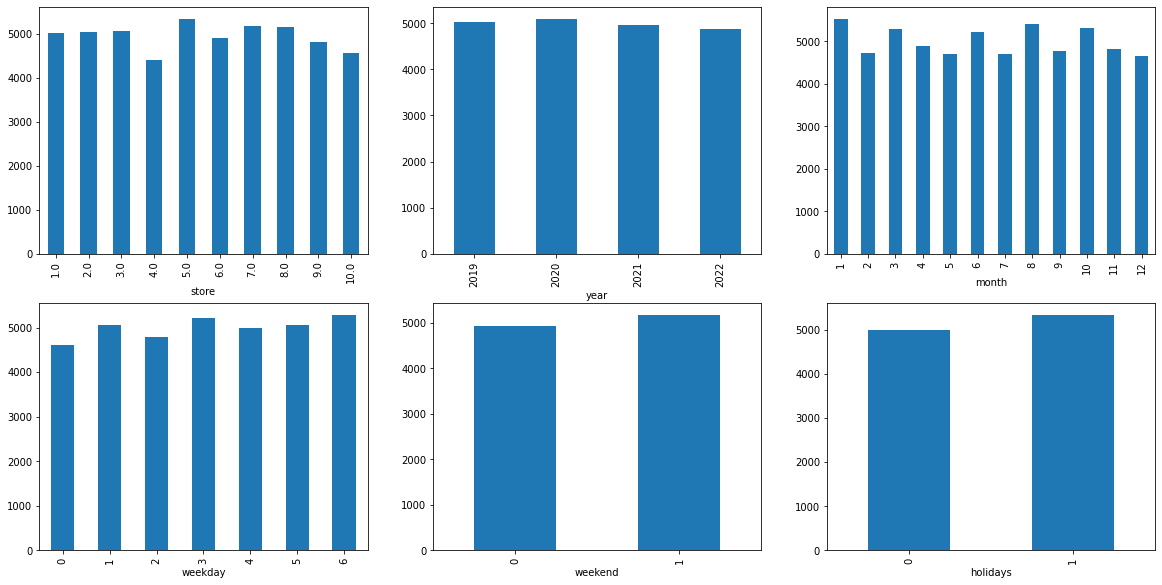

In [32]:
features = ['store', 'year', 'month',\
			'weekday', 'weekend', 'holidays']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(2, 3, i + 1)
	df.groupby(col).mean()['sales'].plot.bar()
plt.show()


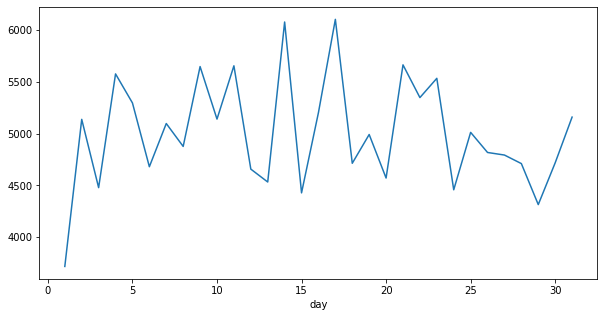

In [33]:
plt.figure(figsize=(10,5))
df.groupby('day').mean()['sales'].plot()
plt.show()


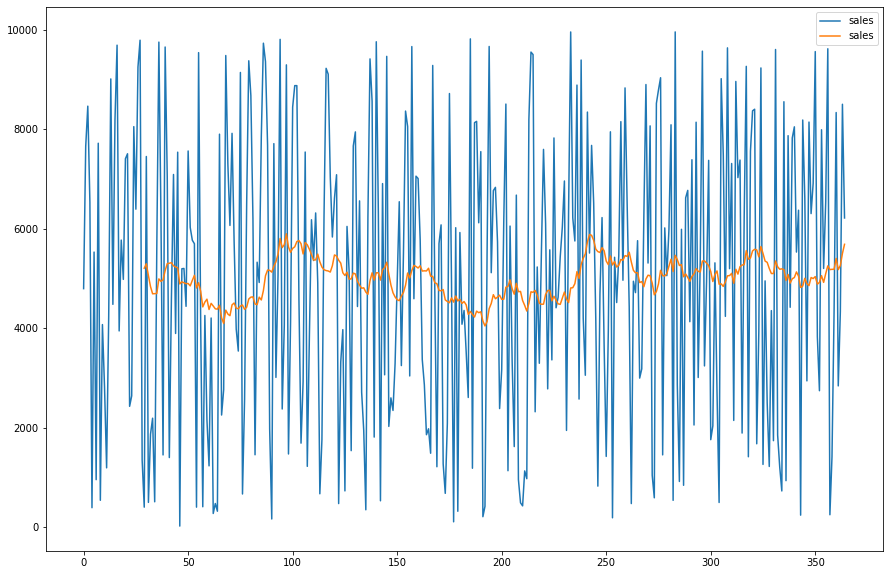

In [34]:
plt.figure(figsize=(15, 10))

# Calculating Simple Moving Average
# for a window period of 30 days
window_size = 30
data = df[df['year']==2019]
windows = data['sales'].rolling(window_size)
sma = windows.mean()
sma = sma[window_size - 1:]

data['sales'].plot()
sma.plot()
plt.legend()
plt.show()


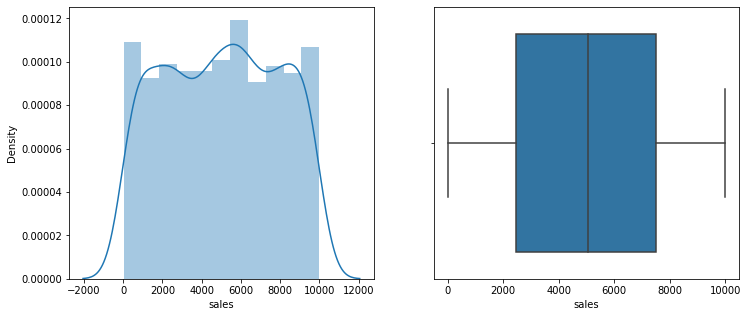

In [35]:
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sb.distplot(df['sales'])

plt.subplot(1, 2, 2)
sb.boxplot(df['sales'])
plt.show()


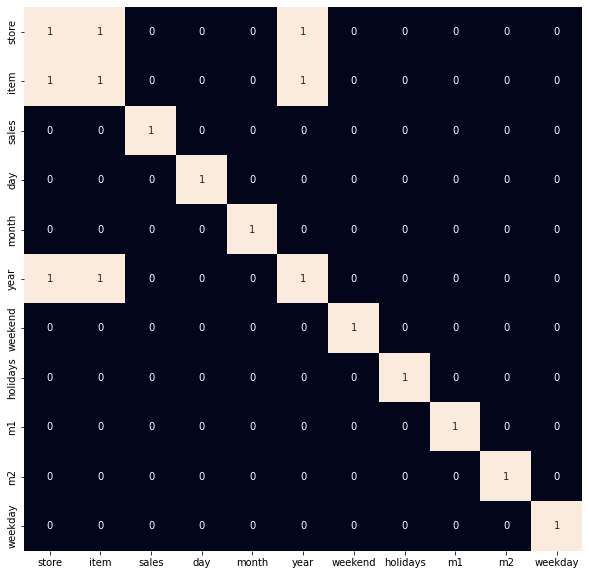

In [36]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.8,
		annot=True,
		cbar=False)
plt.show()


In [37]:
df = df[df['sales']<140]


In [38]:
features = df.drop(['sales', 'year'], axis=1)
target = df['sales'].values


X_train, X_val, Y_train, Y_val = train_test_split(features, target,
												test_size = 0.05,
												random_state=22)
X_train.shape, X_val.shape


((10, 9), (1, 9))

In [39]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [40]:
models = [LinearRegression(), XGBRegressor(), Lasso(), Ridge()]

for i in range(4):
	models[i].fit(X_train, Y_train)

	print(f'{models[i]} : ')

	train_preds = models[i].predict(X_train)
	print('Training Error : ', mae(Y_train, train_preds))

	val_preds = models[i].predict(X_val)
	print('Validation Error : ', mae(Y_val, val_preds))
	print()


LinearRegression() : 
Training Error :  0.9299937264258602
Validation Error :  0.6436413725799

[13:08:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor() : 
Training Error :  0.18597888946533203
Validation Error :  34.865264892578125

Lasso() : 
Training Error :  10.9436125679976
Validation Error :  19.80642414018412

Ridge() : 
Training Error :  18.415077073394908
Validation Error :  35.870414458138626

